In [ ]:
# numerical calculation & data frames
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# statistics
import statsmodels.api as sm

In [ ]:
# pandas options
pd.set_option("mode.copy_on_write", True)
pd.options.display.precision = 2
pd.options.display.float_format = '{:.2f}'.format  # pd.reset_option('display.float_format')
pd.options.display.max_rows = 8

# Numpy options
np.set_printoptions(precision = 2, suppress=True)

In [ ]:
houses_data = sm.datasets.get_rdataset("SaratogaHouses", "mosaicData")

houses = houses_data.data # data
# print(houses_data.__doc__) # documents

houses

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,132500,0.09,42,50000,906,35,2,1,1.00,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.50,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.00,8,hot water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.50,5,hot air,gas,septic,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1724,285000,0.94,37,36200,2564,61,4,1,2.50,11,hot water/steam,gas,public/commercial,No,No,No
1725,194900,0.39,9,20400,1099,51,2,0,1.00,3,hot air,gas,public/commercial,No,No,No
1726,125000,0.24,48,16800,1225,51,3,1,1.00,7,hot air,gas,public/commercial,No,No,No
1727,111300,0.59,86,26000,1959,51,3,0,1.00,6,hot air,gas,septic,No,No,No


In [ ]:
print(houses_data.__doc__)
'''
price가격(미국 달러)
lotSize부지 크기(에이커)
age집의 나이 (년)
landValue토지 가치(미국 달러)
livingArea (평방피트)
pctCollege대학을 졸업한 동네의 비율
bedrooms침실 수
fireplaces벽난로의 수
bathrooms욕실 수(하프 욕실에는 샤워 시설이나 욕조가 없음)
rooms객실 수
heating난방 시스템의 종류
fuel난방에 사용되는 연료
sewer하수도의 종류
waterfront부동산에 해안가가 포함되어 있는지 여부
newConstruction부동산이 신축인지 여부
centralAir집에 중앙 공기가 있는지 여부
'''

.. container::

   ============== ===============
   SaratogaHouses R Documentation
   ============== ===============

   .. rubric:: Houses in Saratoga County (2006)
      :name: houses-in-saratoga-county-2006

   .. rubric:: Description
      :name: description

   Data on houses in Saratoga County, New York, USA in 2006

   .. rubric:: Usage
      :name: usage

   ::

      data(SaratogaHouses)

   .. rubric:: Format
      :name: format

   A data frame with 1728 observations on the following 16 variables.

   -  ``price`` price (US dollars)

   -  ``lotSize`` size of lot (acres)

   -  ``age`` age of house (years)

   -  ``landValue`` value of land (US dollars)

   -  ``livingArea`` living are (square feet)

   -  ``pctCollege`` percent of neighborhood that graduated college

   -  ``bedrooms`` number of bedrooms

   -  ``fireplaces`` number of fireplaces

   -  ``bathrooms`` number of bathrooms (half bathrooms have no shower
      or tub)

   -  ``rooms`` number of rooms

   -  ``

위 데이터를 이용하여, 이 단원에서 다룬 탐색적 분석을 연습

- 집 값을 예측하는 변수들 중 관심있는 변수들을 선택하면서
- 질문과 함께 분석을 실시, 예를 들어
 - Variation: Categorical variables

   - 어떤 종류의 연료를 사용하며 그 분포는 어떠한가?
 - Covariation: A categorical and continuous variable

   - 어떤 연료를 사용하는지가 집 값을 결정하는데 어떻게 관계를 맺는가?
 - Covariation: Two continuous variables

   - 집 값에 가장 크게 영향을 주는 요소는? livingArea??
 - 다음 코드를 이용하여, living area가 설명하지 못하는 price의 variation (resid)를 다른 변수들이 얼마나 예측가능한지 살펴보세요. 

# Variation: Categorical variables
어떤 종류의 연료를 사용하며 그 분포는 어떠한가?

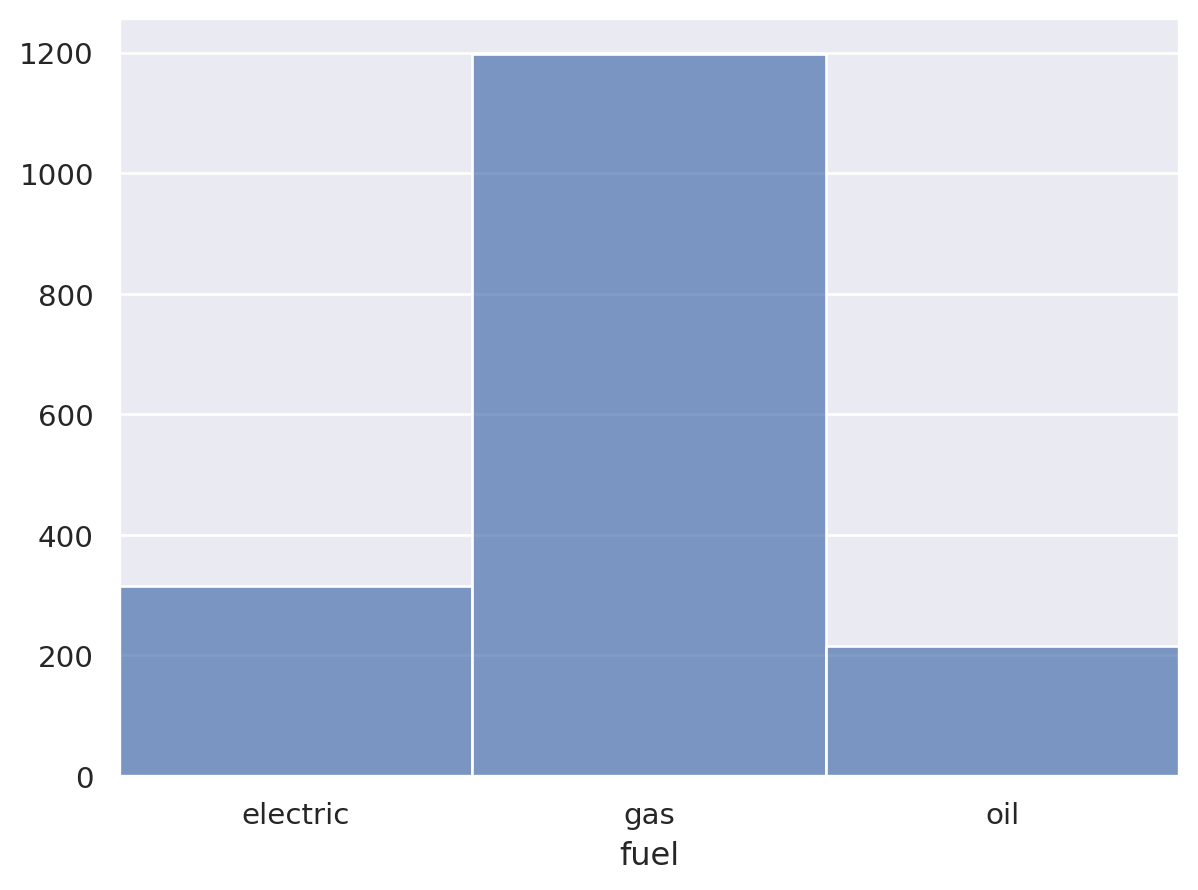

In [ ]:
so.Plot(houses, x="fuel").add(so.Bars(), so.Hist(binwidth=.5))

In [ ]:
 # 동일한 길이의 10개 구간
living_cut =(
    houses.assign( living_Area = lambda x: pd.cut(x.livingArea, 10))
    .value_counts("living_Area")
)
living_cut

living_Area
(1077.2, 1538.4]     521
(1538.4, 1999.6]     460
(1999.6, 2460.8]     282
(611.388, 1077.2]    216
                    ... 
(3383.2, 3844.4]       8
(3844.4, 4305.6]       5
(4305.6, 4766.8]       2
(4766.8, 5228.0]       2
Length: 10, dtype: int64

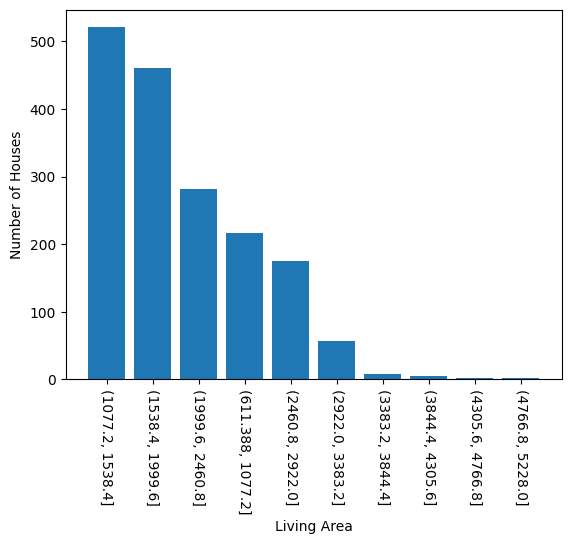

In [ ]:
plt.bar(living_cut.index.astype(str), living_cut)
plt.xlabel('Living Area')
plt.ylabel('Number of Houses')
plt.xticks(rotation=270)
plt.show()

In [ ]:
houses_area = houses.assign(
    living_Area=lambda x: pd.cut(x.livingArea, 20, labels=False),
    living_qArea=lambda x: pd.qcut(x.livingArea, 20, labels=False),
)

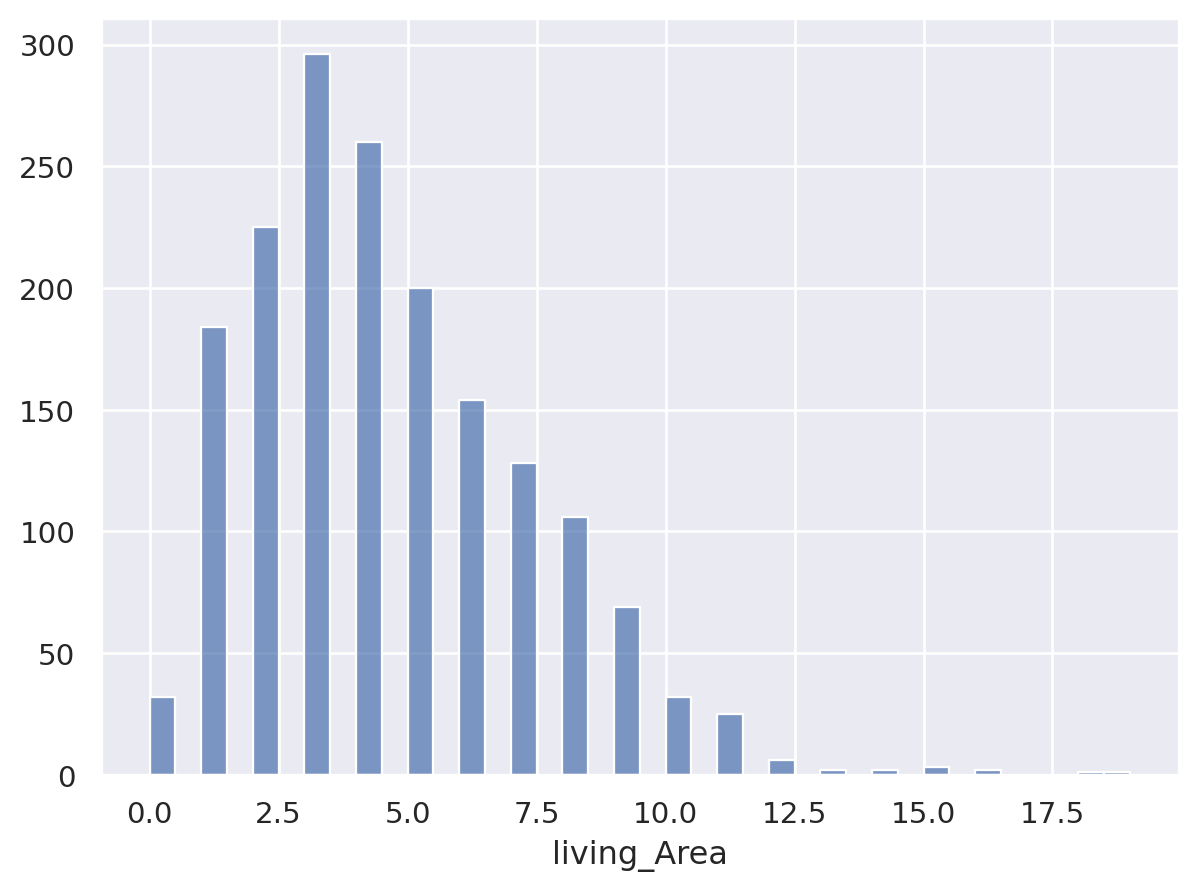

In [ ]:
so.Plot(houses_area, x="living_Area").add(so.Bars(), so.Hist(binwidth=.5))

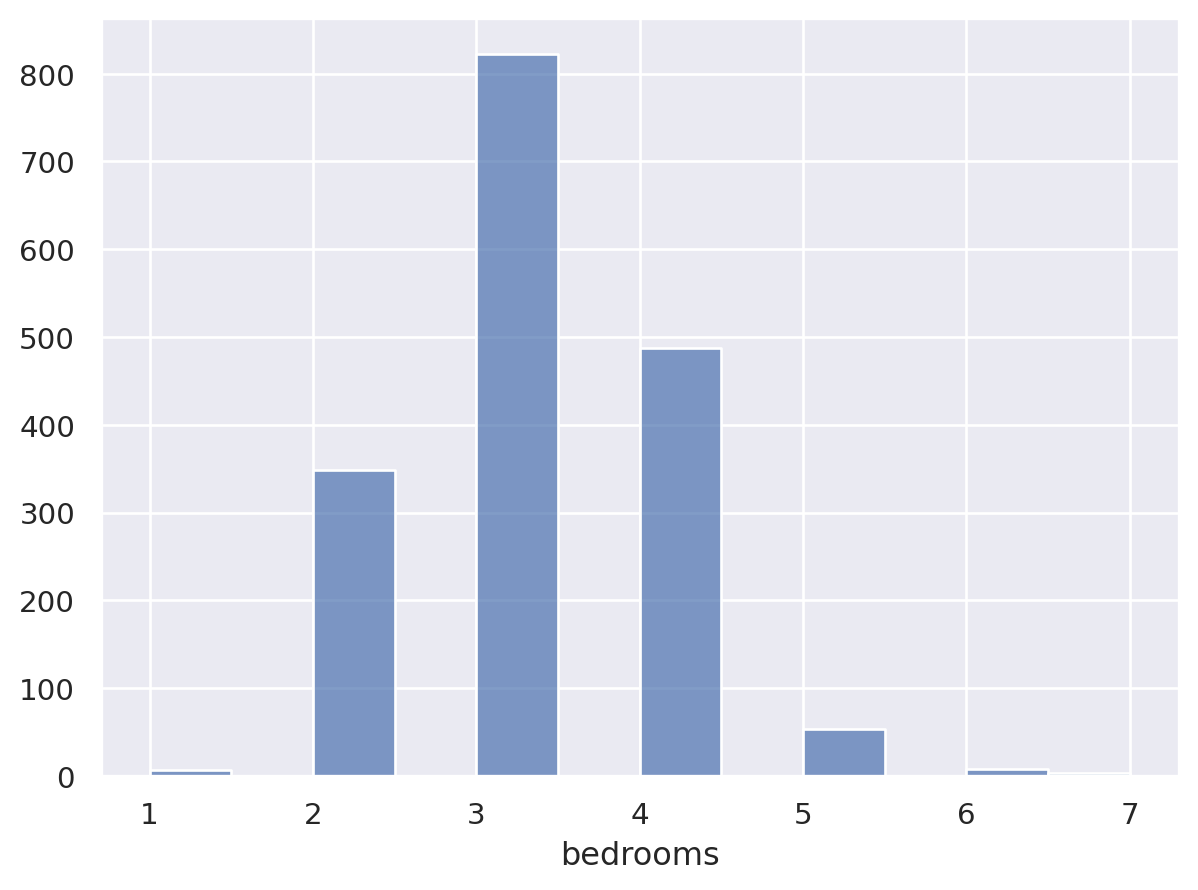

In [ ]:
so.Plot(houses, x="bedrooms").add(so.Bars(), so.Hist(binwidth=.5))

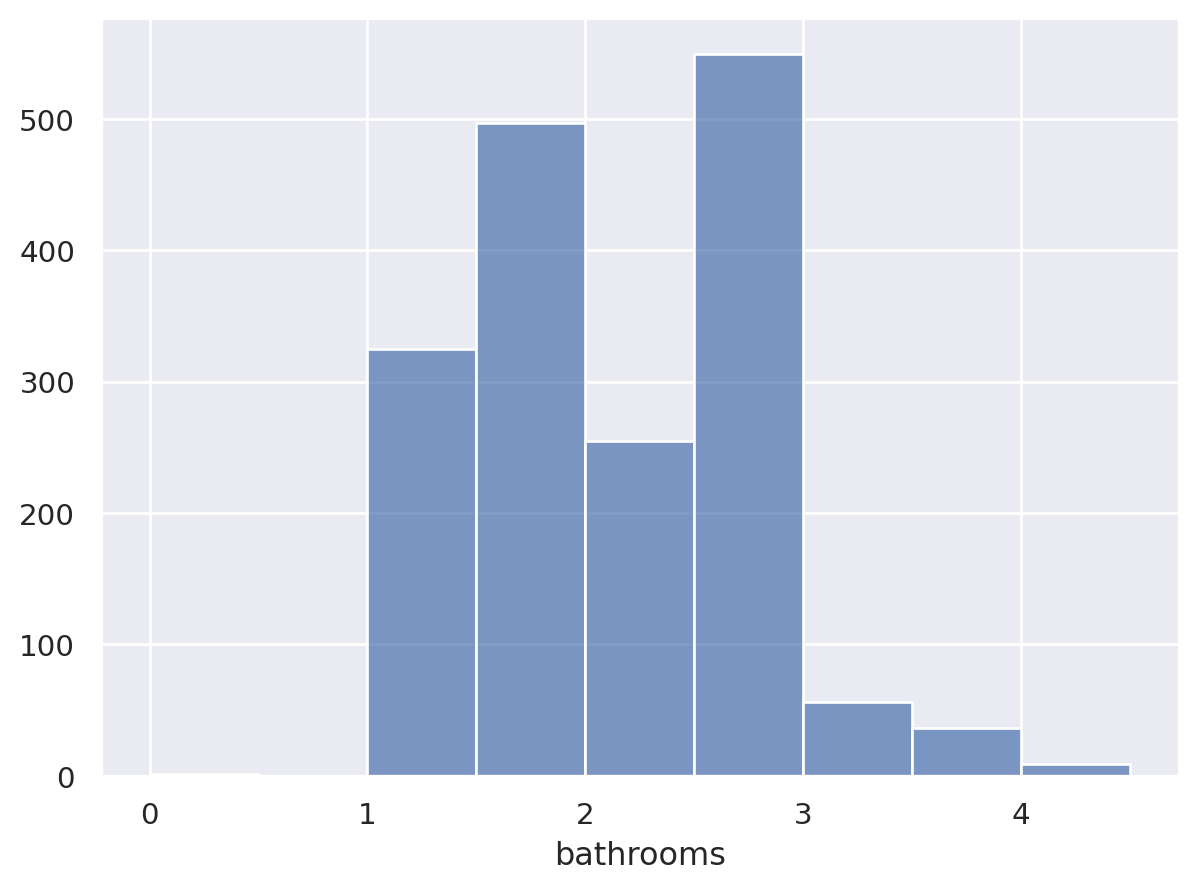

In [ ]:
so.Plot(houses, x="bathrooms").add(so.Bars(), so.Hist(binwidth=.5))

# Covariation: A categorical and continuous variable

어떤 연료를 사용하는지가 집 값을 결정하는데 어떻게 관계를 맺는가?

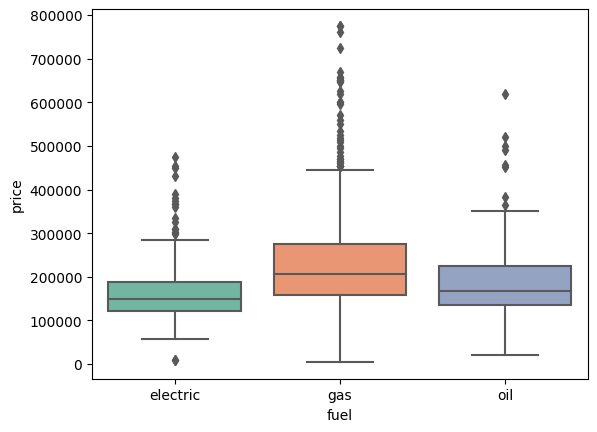

In [ ]:
# 어떤 종류의 연료를 사용하며 그 분포는 어떠한가?

sns.boxplot(houses, x="fuel", y="price", palette="Set2")
plt.show() 

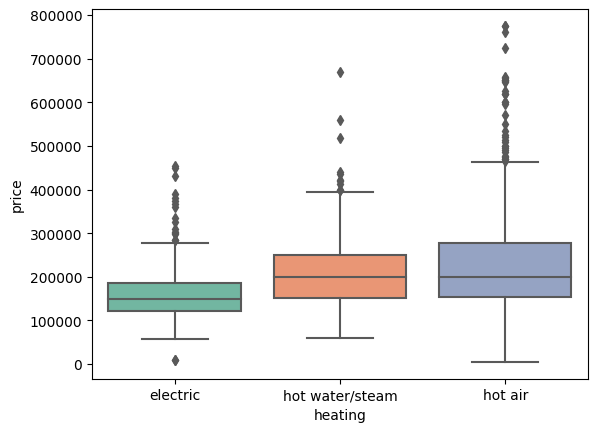

In [ ]:
# 어떤 종류의 난방을 쓰며 그 분포는 어떠한가?

sns.boxplot(houses, x="heating", y="price", palette="Set2")
plt.show() 

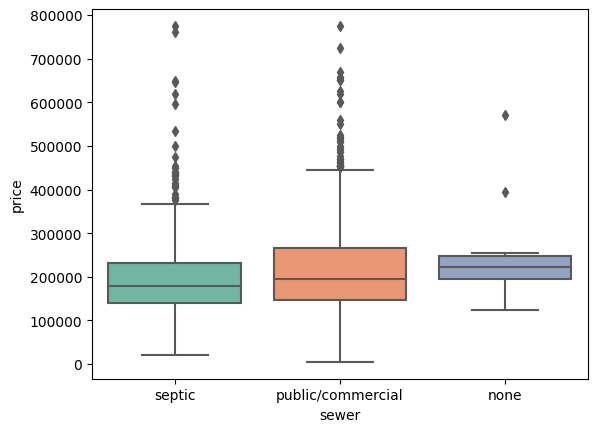

In [ ]:
# 어떤 종류의 하수도를 가지고 있으며 그 분포는 어떠한가? 

sns.boxplot(houses, x="sewer", y="price", palette="Set2")
plt.show() 

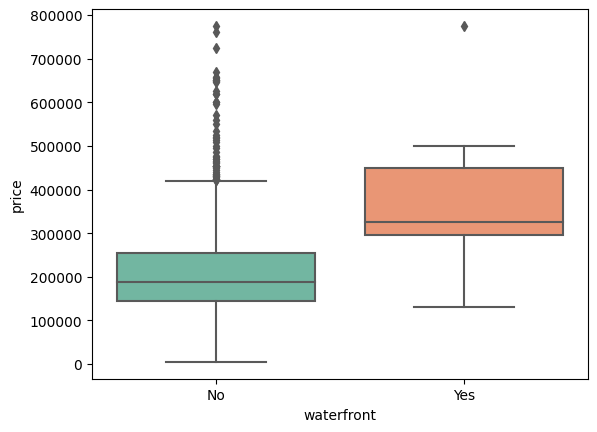

In [ ]:
# 집앞에 수영장이 있는가?

sns.boxplot(houses, x="waterfront", y="price", palette="Set2")
plt.show() 

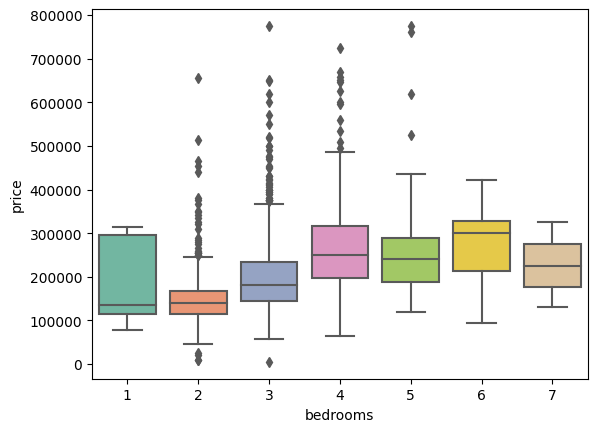

In [ ]:
sns.boxplot(houses, x="bedrooms", y="price", palette="Set2")
plt.show() 

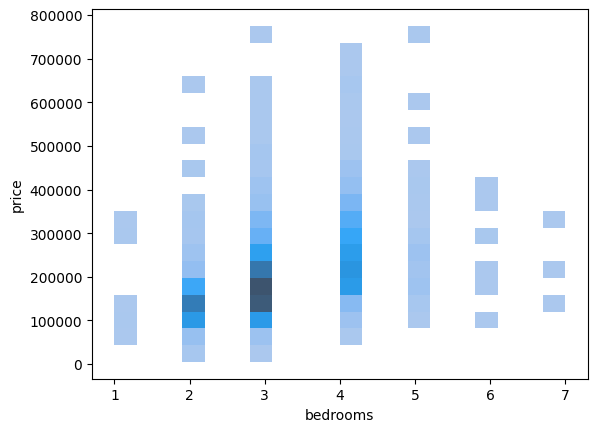

In [ ]:
sns.histplot(houses, x="bedrooms", y="price", bins=20)
plt.show()

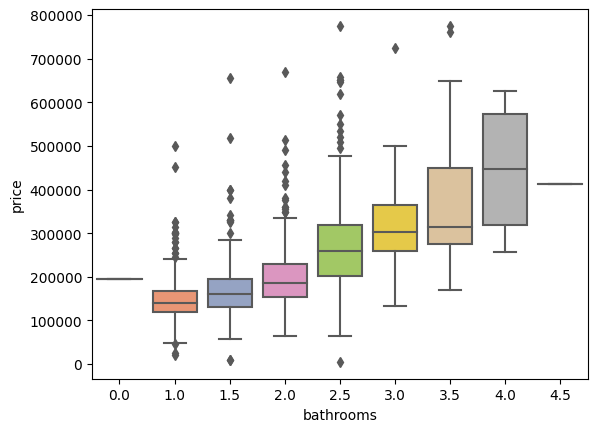

In [ ]:
sns.boxplot(houses, x="bathrooms", y="price", palette="Set2")
plt.show() 

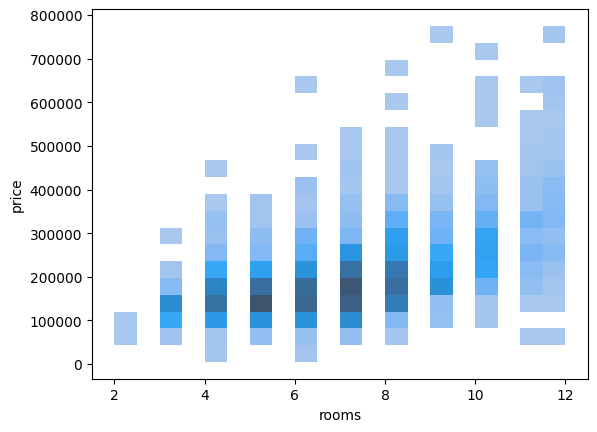

In [ ]:
sns.histplot(houses, x="rooms", y="price", bins=20)
plt.show()

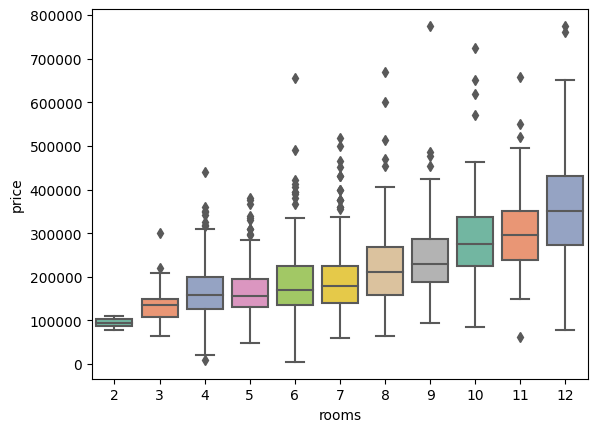

In [ ]:
sns.boxplot(houses, x="rooms", y="price", palette="Set2")
plt.show()

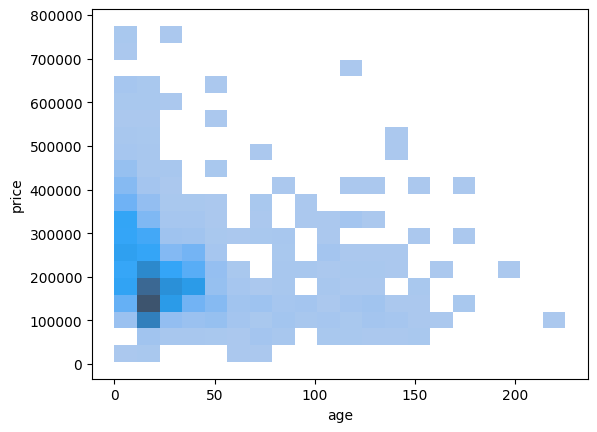

In [ ]:
sns.histplot(houses, x="age", y="price", bins=20)
plt.show()

# Covariation: Two continuous variables

집 값에 가장 크게 영향을 주는 요소는? livingArea??

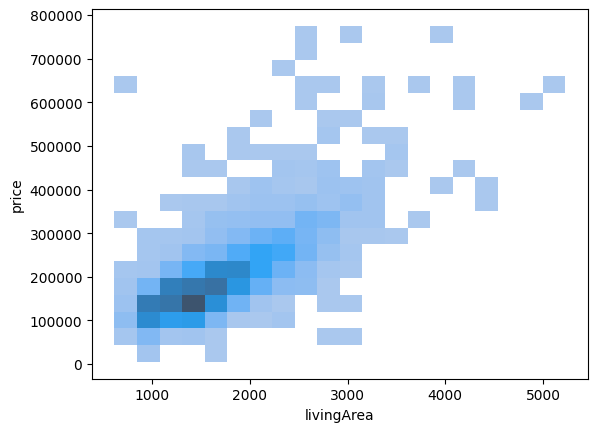

In [ ]:
sns.histplot(houses, x="livingArea", y="price", bins=20)
plt.show()

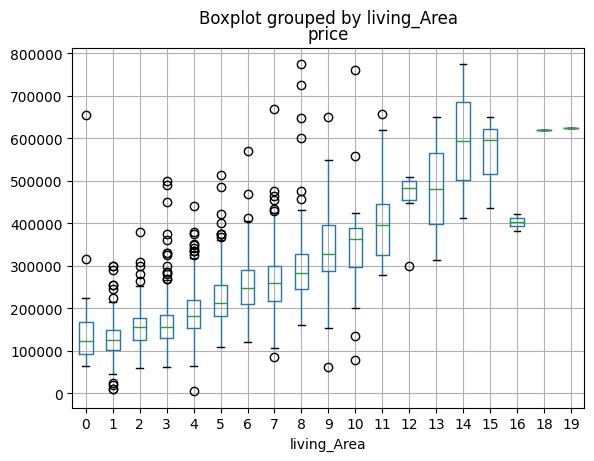

In [ ]:
houses_area.boxplot("price", by="living_Area")  # pandas boxplot 
plt.show()

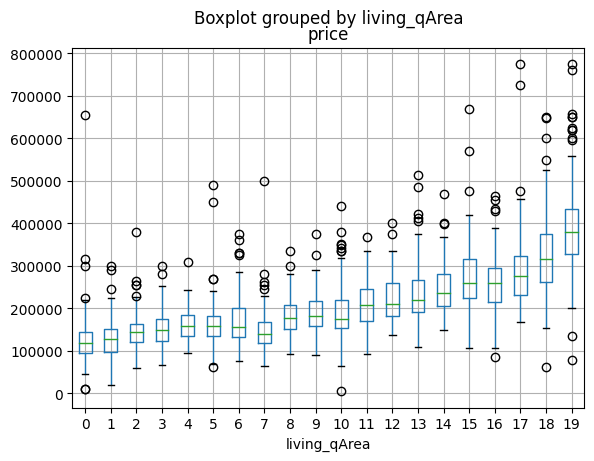

In [ ]:
houses_area.boxplot("price", by="living_qArea")  # pandas boxplot 
plt.show()

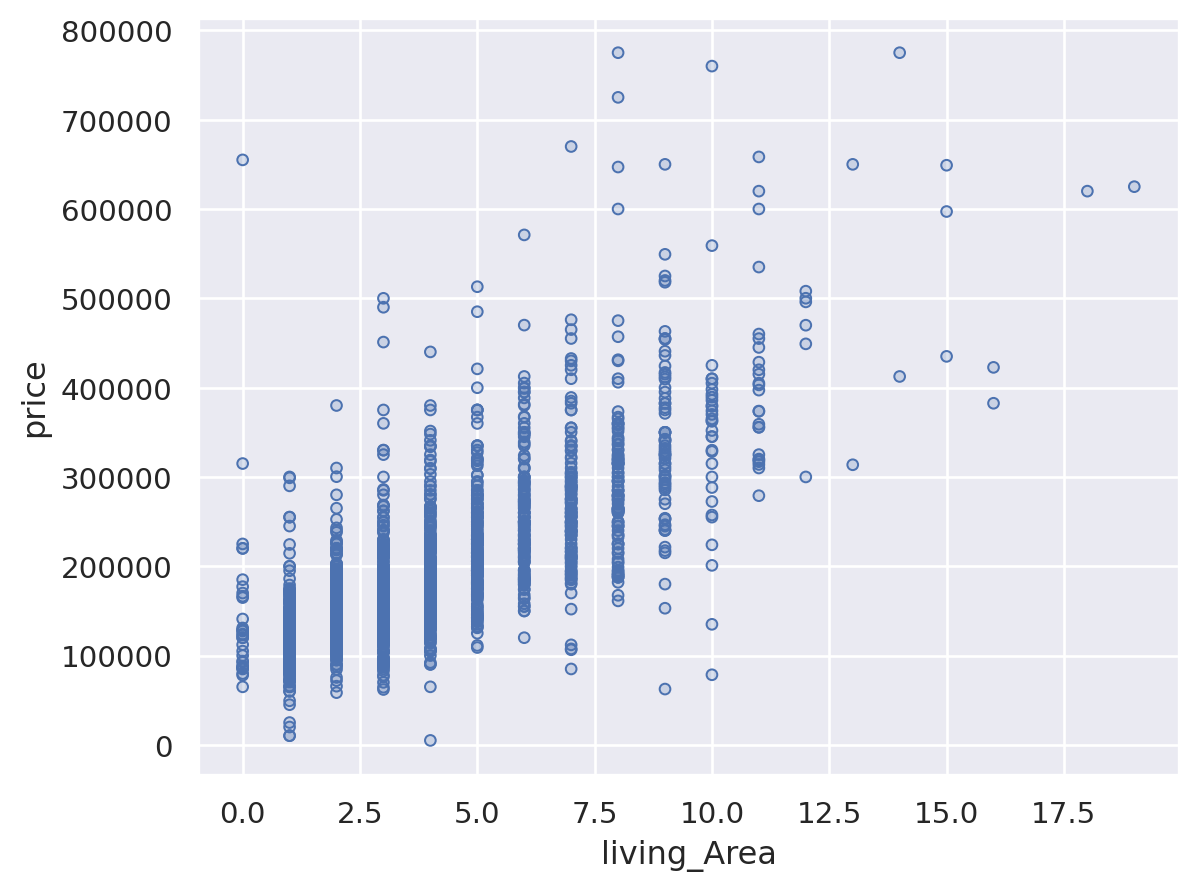

In [ ]:
(
    so.Plot(houses_area, x='living_Area', y='price')
    .add(so.Dots())
)

In [ ]:
import statsmodels.formula.api as smf

houses2 = houses.assign(
    log_area = np.log(houses.livingArea),
    log_price = np.log(houses.price)
)

houses_fit = smf.ols('log_price ~ log_area', data=houses2).fit()

houses2 = houses2.assign(
    log_pred = houses_fit.fittedvalues,
    log_resid = houses_fit.resid,
    pred = lambda x: np.exp(x.log_pred),
    resid = lambda x: np.exp(x.log_resid),
    resid_diff = lambda x: x.price - x.pred
)

houses2[[ "livingArea", "price", "pred", "resid", "resid_diff"]]

,livingArea,price,pred,resid,resid_diff
0,906,132500,112392.77,1.18,20107.23
1,1953,181115,223018.38,0.81,-41903.38
2,1944,109000,222101.24,0.49,-113101.24
3,1944,155000,222101.24,0.70,-67101.24
...,...,...,...,...,...
1724,2564,285000,284320.62,1.00,679.38
1725,1099,194900,133525.31,1.46,61374.69
1726,1225,125000,147102.04,0.85,-22102.04
1727,1959,111300,223629.55,0.50,-112329.55


In [ ]:
# show coefficients
print(houses_fit.params)

# print R-squared
print(houses_fit.rsquared)

Intercept   5.55
log_area    0.89
dtype: float64
0.4696304811392261


In [ ]:
# import sklearn regression models
from sklearn.linear_model import LinearRegression

# create linear model where x is log_area and y is log_price
lm = LinearRegression()
lm.fit(houses2[["log_area"]], houses2[["log_price"]])

LinearRegression()

In [ ]:
# show coefficients
print(lm.coef_)

# print intercept
print(lm.intercept_)

# print R-squared
print(lm.score(houses2[["log_area"]], houses2[["log_price"]]))

[[0.89]]
[5.55]
0.4696304811392261


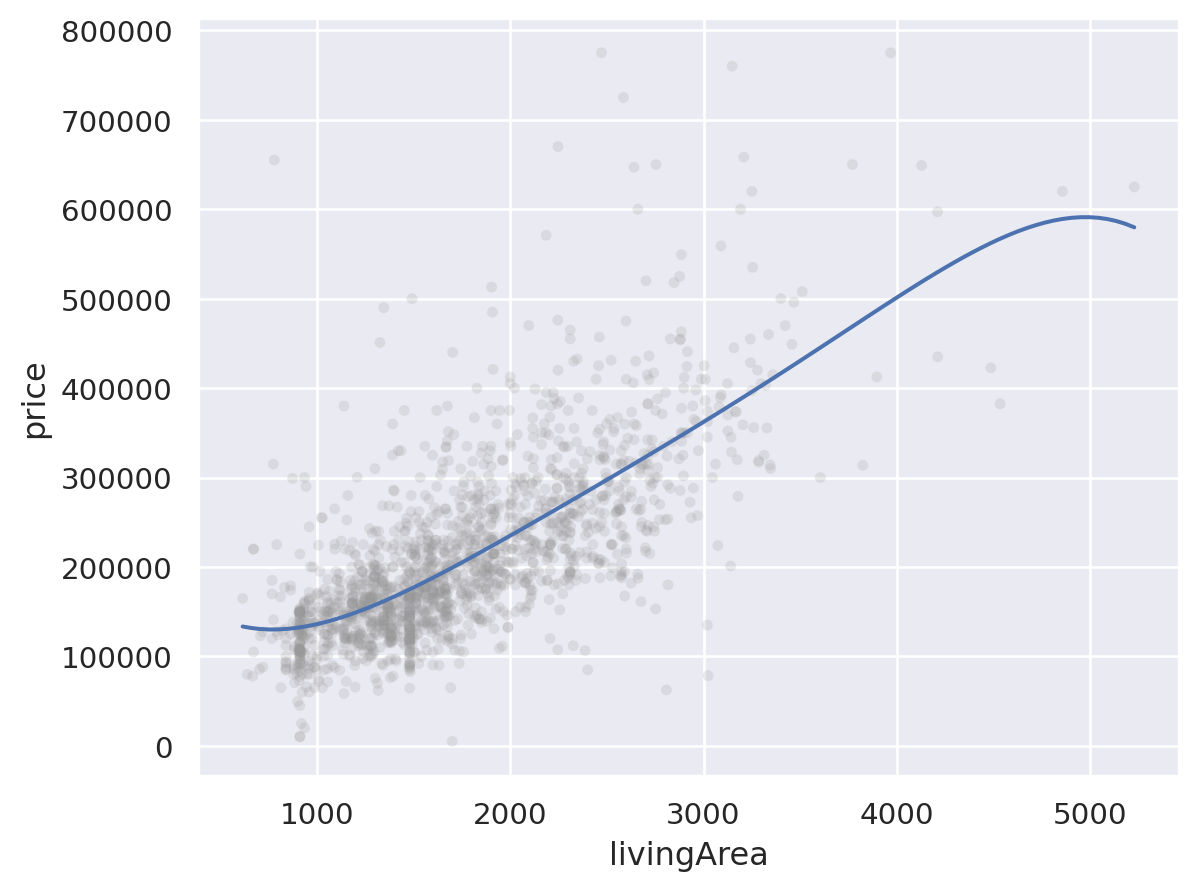

In [ ]:
(
    so.Plot(houses, x="livingArea", y="price")
    .add(so.Dots(alpha=1/100, color=".6"))
    .add(so.Line(), so.PolyFit(5))
)

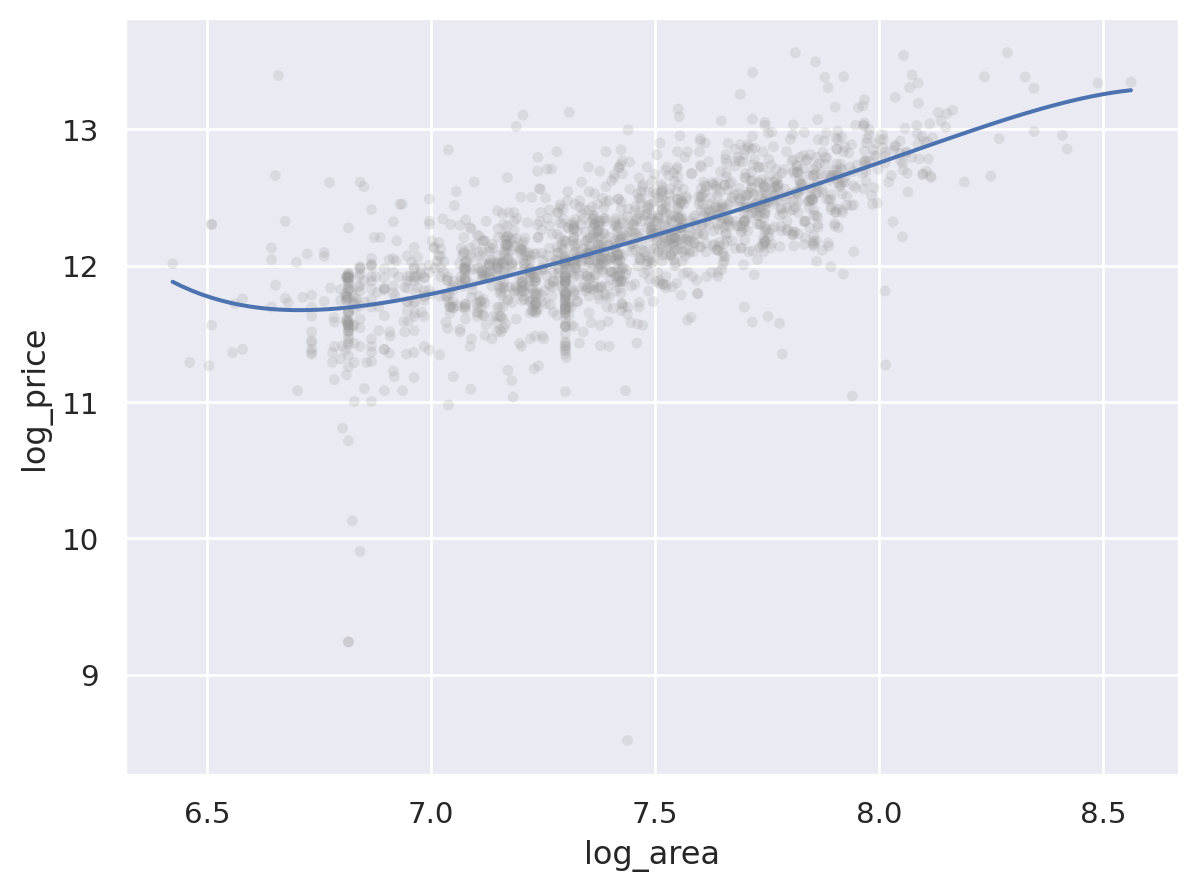

In [ ]:
(
    so.Plot(houses2, x="log_area", y="log_price")
    .add(so.Dots(alpha=1/100, color=".6"))
    .add(so.Line(), so.PolyFit(5))
)

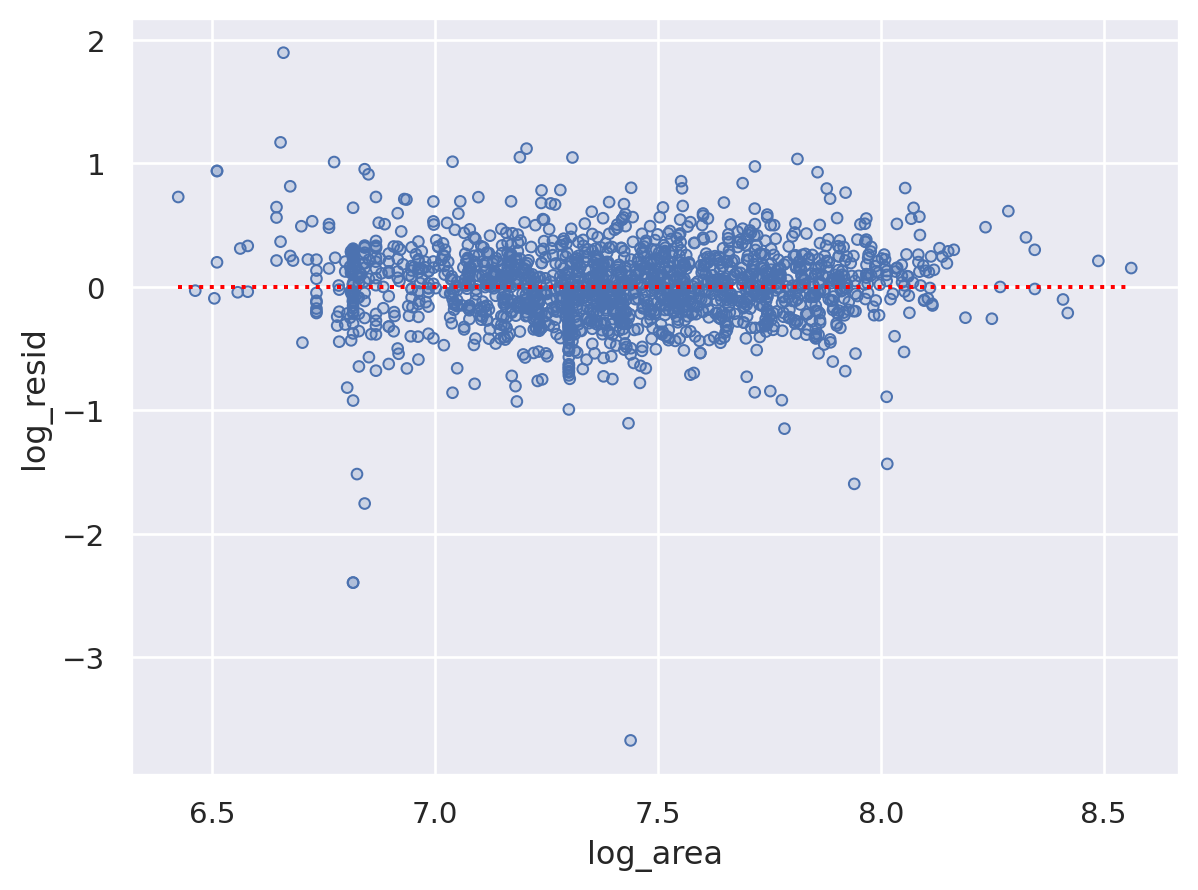

In [ ]:
(
    so.Plot(houses2, x='log_area', y='log_resid')
    .add(so.Dots())
    .add(so.Line(linestyle=":", color="red"), so.Agg(lambda x: 0))
)

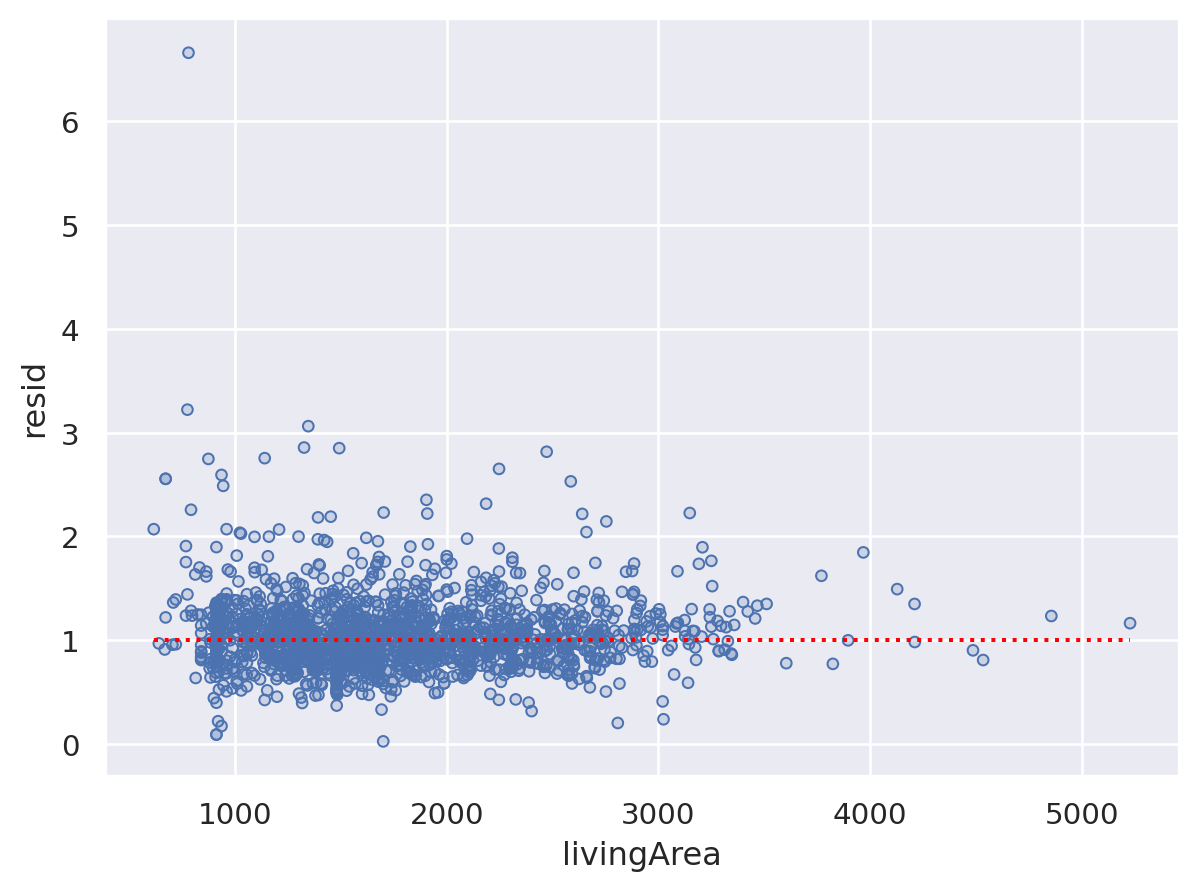

In [ ]:
(
    so.Plot(houses2, x='livingArea', y='resid')
    .add(so.Dots())
    .add(so.Line(linestyle=":", color="red"), so.Agg(lambda x: 1))
)

다음 코드를 이용하여, living area가 설명하지 못하는 price의 variation (resid)를 다른 변수들이 얼마나 예측가능한지 살펴보세요. 예를 들어,

In [ ]:
"""
Seaborn.objects statistical plotting custom functions.
boxplot, rangeplot
"""

import seaborn as sns
import seaborn.objects as so


def boxplot(df, x, y, color=None, alpha=0.1, marker="<"):
    
    return (
        so.Plot(df, x=x, y=y, color=color)
        .add(so.Dots(alpha=alpha, color=".6"), so.Jitter(), so.Dodge())
        .add(so.Range(), so.Est("median", errorbar=("pi", 50)), so.Dodge())
        .add(so.Dot(pointsize=8, marker=marker), so.Agg("median"), so.Dodge())
        .scale(color="Dark2")
        .theme({**sns.axes_style("whitegrid")})
    )


def rangeplot(df, x, y, color=None, alpha=0.1):

    return (
        so.Plot(df, x=x, y=y, color=color)
        .add(so.Range(), so.Est("median", errorbar=("pi", 50)), so.Dodge())
        .add(so.Dots(pointsize=8, marker="<"), so.Agg("median"), so.Dodge())
        .scale(color="Dark2")
        .theme({**sns.axes_style("whitegrid")})
    )

In [ ]:
import statsmodels.formula.api as smf
# import sklearn regression models
from sklearn.linear_model import LinearRegression

houses_fit = smf.ols('price ~ livingArea', data = houses).fit()
houses = houses.assign(
    pred=houses_fit.fittedvalues,
    resid = houses_fit.resid
)

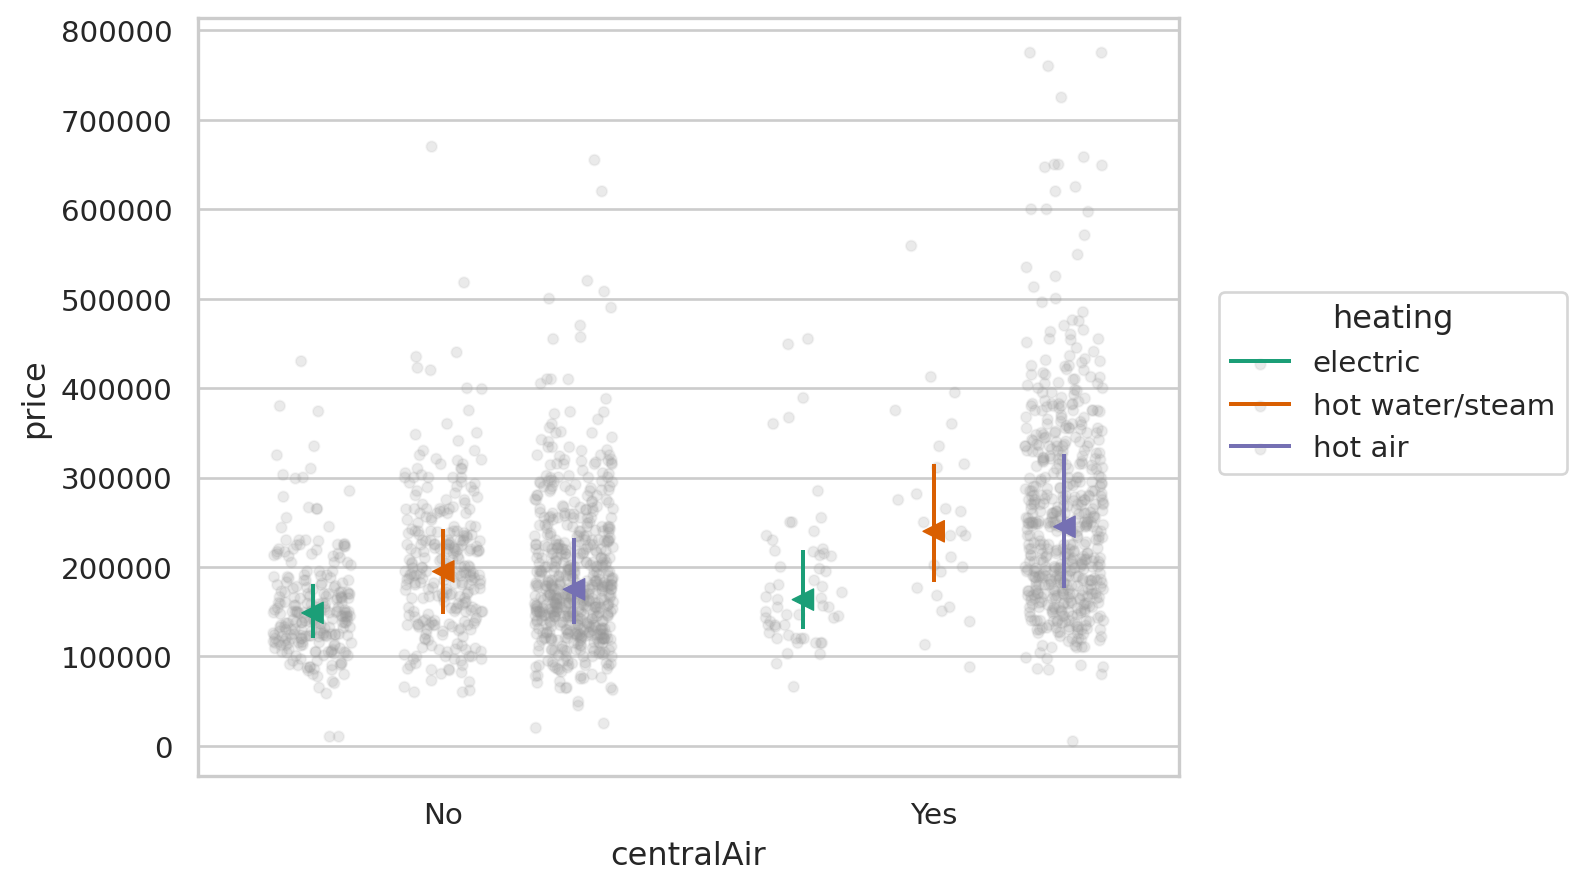

In [ ]:
boxplot(houses, x="centralAir", y="price", color="heating")

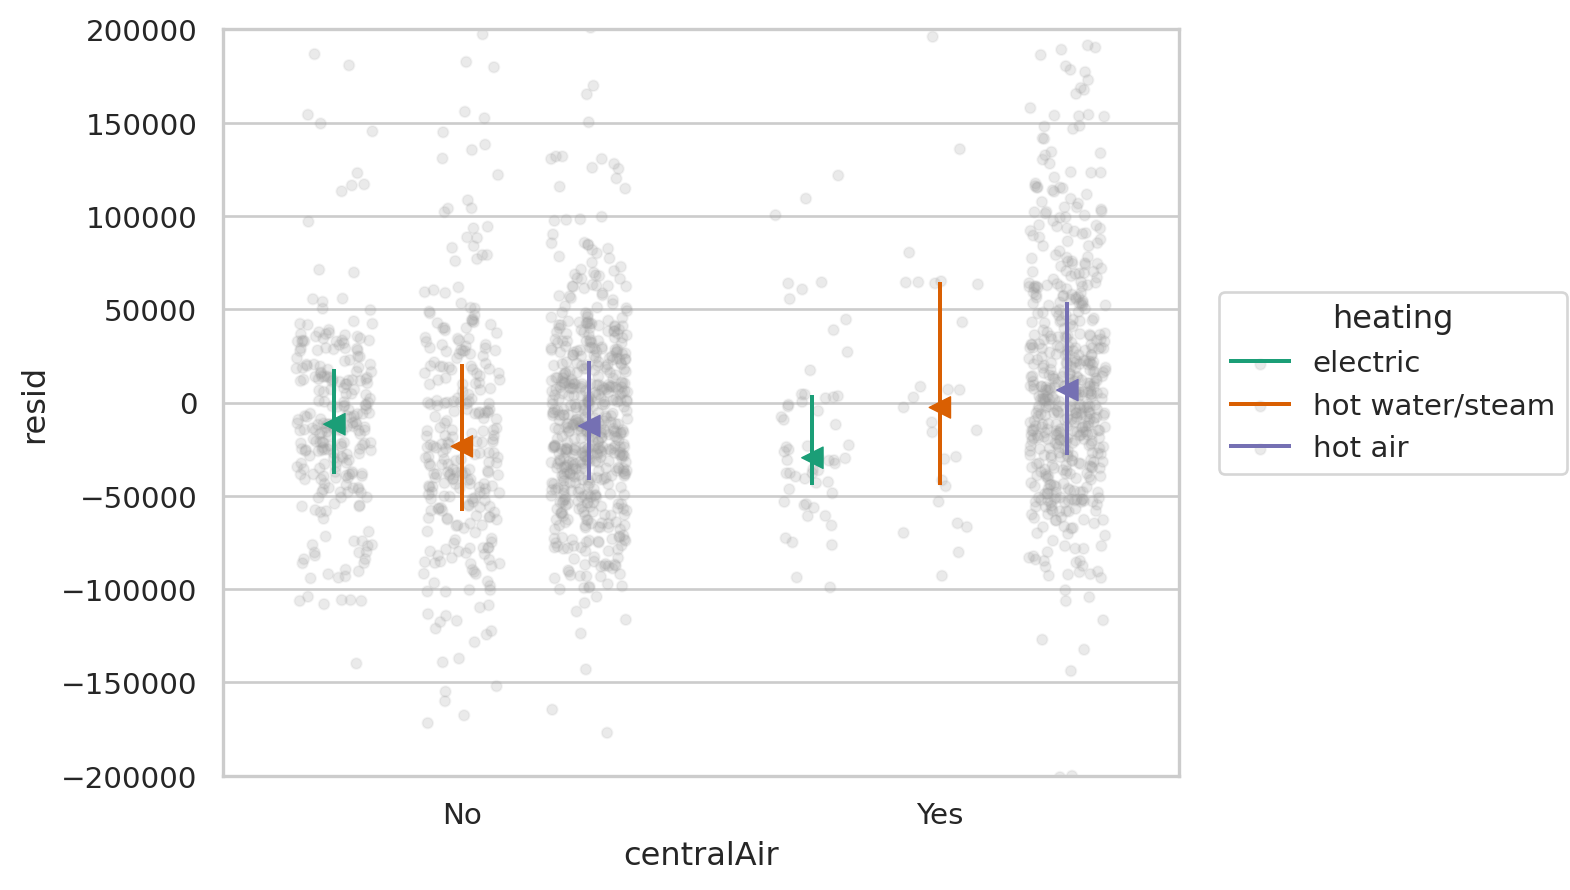

In [ ]:
boxplot(houses, x="centralAir", y="resid", color="heating").limit(y=(-200000, 200000))

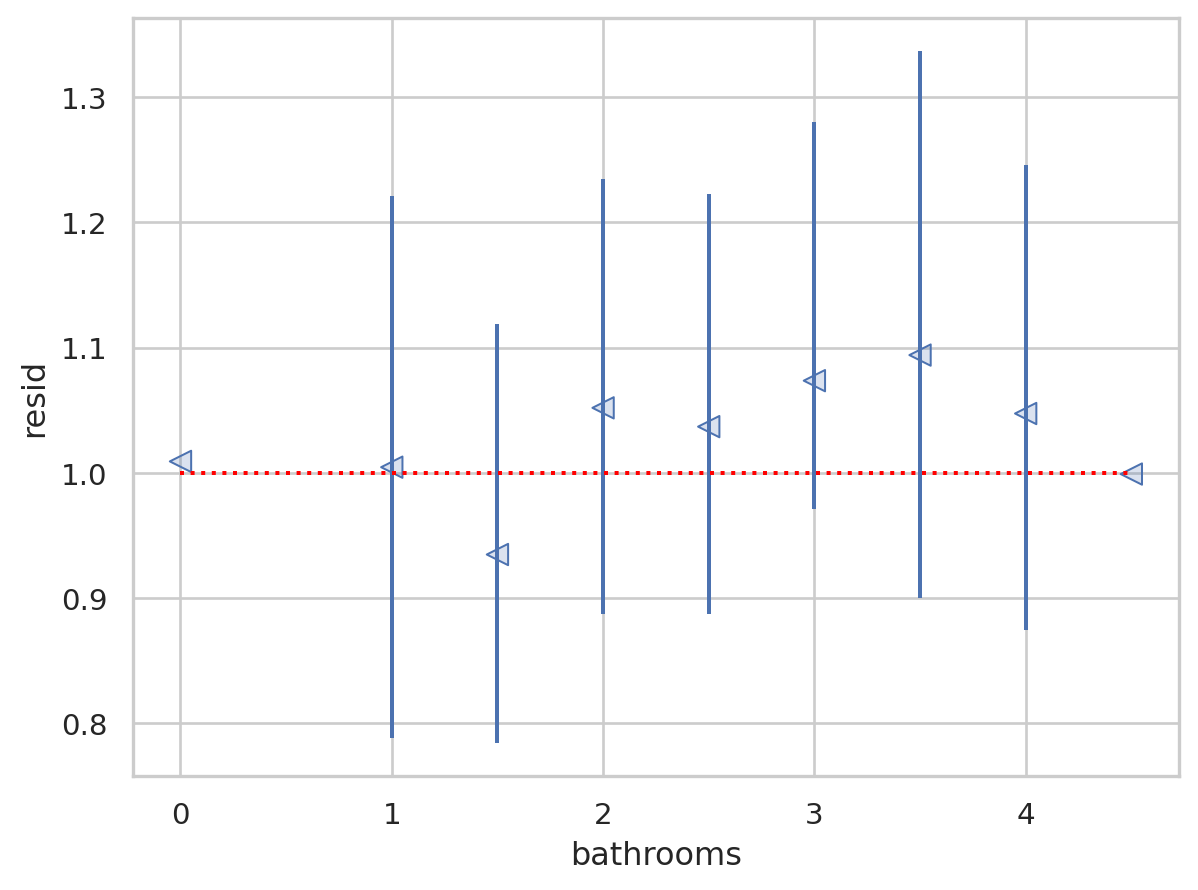

In [ ]:
(
    rangeplot(houses2, x="bathrooms", y="resid")
    .add(so.Line(linestyle=":", color="red"), so.Agg(lambda x: 1))
)

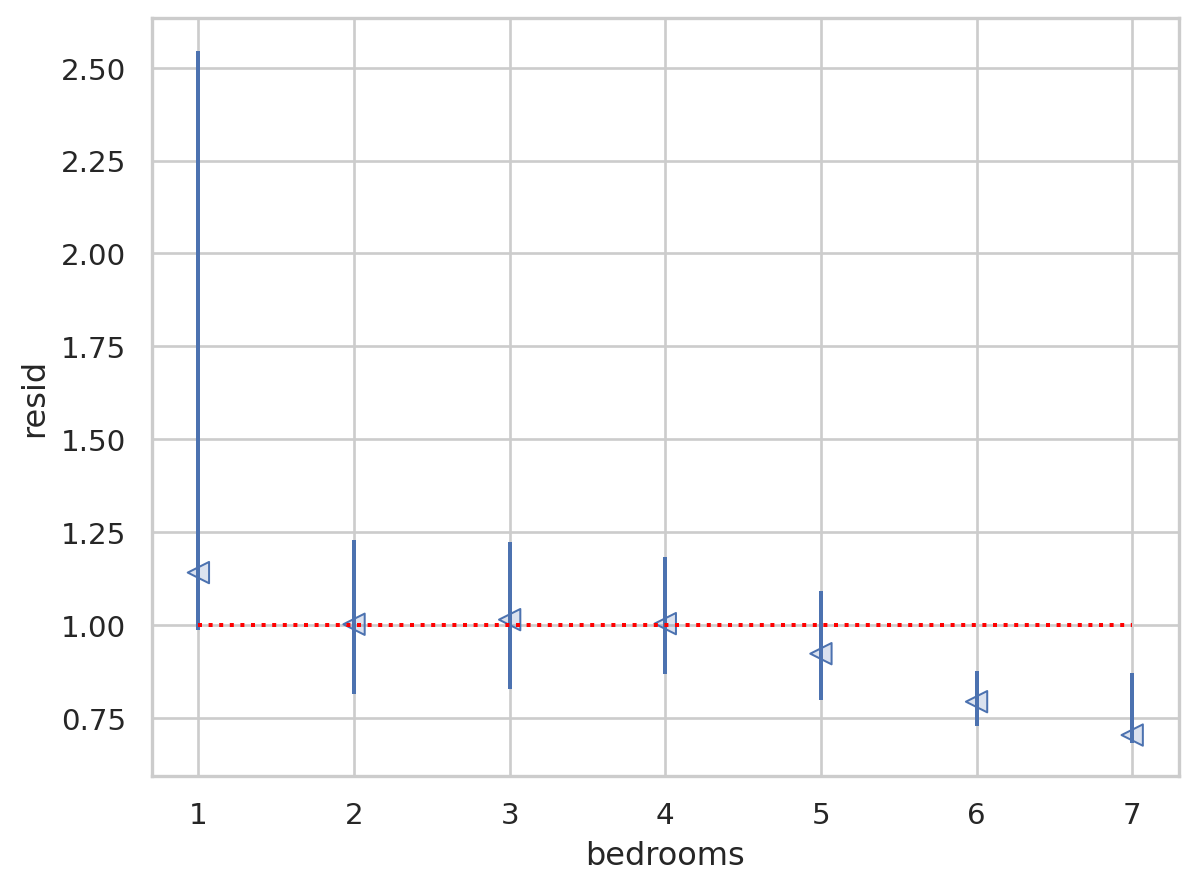

In [ ]:
(
    rangeplot(houses2, x="bedrooms", y="resid")
    .add(so.Line(linestyle=":", color="red"), so.Agg(lambda x: 1))
)

In [ ]:
# bedrooms를 이용하면 living area가 설명하지 못하는 price의 resid를 예측할 수 있을수 있다.